# Comparison of Classifiers

## Introduction

__Classification__ is a supervised machine learning problem where the algorithm or model predicts the class of a sample from it's features. Here  the __target__ _y_ is a categorical variable rather than a real variable like in a Regression problem. Statistically, the problem is to build a **decision boundary** for each class which will **separate that class from the rest of the  other classes**. If a classification problem has only two classes, then it is called a __Binary Classification__ problem and in this scenario we only require a single decision boundary to separate both classes.

Based on the nature of the decision boundary, there are mainly two types of classifiers:

- **Linear Classifiers**: (Ex. Logistic Regression, Support Vector Machine with Linear Kernel) The decision boundary is a straight line separating the classes. These models are fairly straightforward and are very popular for their simplicity.

- **Nonlinear Classifiers**: (Ex. k-NN, Decision Tree, Random Forest, Support Vector Machines with nonlinear kernels) This is a much broader and more complex category of classifiers. These models are used for solving complex machine learning problems and also when the data is not separable by a straight line.

In this Notebook, we will go over some of the widely used classifiers:

1. Logistic Regression

2. Support Vector Machines with Radial Basis Kernel

3. k-Nearest Neighbors

4. Decision Tree Classifier

5. Random Forest Classifier

6. Gaussian Naïve Bayes Classifier

## Evaluation of Model

Once our model is trained, now a question arises, how to evaluate the model? how to compare two different classifiers? 

There are numerus methods to evaluate and compare classification models but the in this notebook, we will be using:

1. Confusion Matrix

2. Sensitivity or Recall

3. Specificity

4. AUC - ROC Curve

## Note

This notebook is available on:
 
 - [GitHub](https://github.com/arnabd64/classifier-comparison-1)
 - [Kaggle](https://www.kaggle.com/arnabdata/comparison-of-classification-models)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Train-Test Split
from sklearn.model_selection import train_test_split
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
# For model evaulation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

# The Dataset

## About

A car manufacturer wants to build a social media advertisement campaign for a new SUV. The company will use data from it's existing customer database to build a model and use it to target ads to users who have been predicted to purchase an SUV.

## Features

The dataset contains 400 observations on the following features

1. _User ID_: (`int`) User ID of customer
2. _Gender_: (`str`) Male or Female
3. _Age_: (`int`) Age of customer during purchase
4. _EstimatedSalary_: (`int`) Predicted Salary in USD of customer during purchase
5. _Purchased_: (`int`) If the customer purchased an SUV then the value is $1$ and $0$ otherwise

__Note:__ The dataset does not contain missing or duplicate observations.

In [2]:
df = pd.read_csv("SUV_Purchase.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


# Data Preprocessing

## Cleaning

- _User ID_ does not contribute anything to the model
- _Gender_ is in String format whoch needs to be transformed to integer

In [4]:
# Class Names
class_names = {'Not Purchased':0, 'Purchased':1}
# Remove User ID
df.drop('User ID', axis = 1, inplace = True)
# Encoding Gender
df.replace({'Male':1, 'Female':0}, inplace = True)

df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


## Feature Scaling

Since classifiers like k-NN, SVM and Logistic Regression are sensitive to the variability of the Features, we must bring all the Features to a comparable scale

In [5]:
sc = StandardScaler()
df[['Age','EstimatedSalary']] = sc.fit_transform(df.loc[:, ['Age','EstimatedSalary']])
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,-1.781797,-1.490046,0
1,1,-0.253587,-1.460681,0
2,0,-1.113206,-0.785290,0
3,0,-1.017692,-0.374182,0
4,1,-1.781797,0.183751,0


## Train-Test Split

We are going to  split the dataset into training set and testing set with a test_size of $20\%$

In [6]:
# variable Separation
X = df.drop('Purchased', axis = 1).values
y = df.loc[:, 'Purchased'].values
# Train test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# results
print("X_train: ",np.shape(X_train))
print("y_train: ",np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train:  (320, 3)
y_train:  (320,)
X_test: (80, 3)
y_test: (80,)


# Dimensionality Reduction

Here we want to build a classifier using only 2 features but we have 3. Using __Principal Component Analysis__ we will reduce the 3 features into 2 principal components such that maximum variation is captured by the PCA.

In [7]:
# PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
## results of 
print('Variance Captured by PCA')
for i in np.arange(pca.n_components_):
    print("PC{0:d}: {1:.1f}%".format(i+1, 100*pca.explained_variance_ratio_[i]))

Variance Captured by PCA
PC1: 52.3%
PC2: 36.9%


# Defining functions for Model evaluation

## AUC-ROC Curve

The __Receiver Operating Characteristic Curve__ or __ROC Curve__ is visual tool which illustrates the performance of a Binary Classifier. It is a plot where the X-axis is __False Positive Rate (FPR)__ and Y-axis is __True Positive Rate (TPR)__. Thus in a sense it represents the tradeoff between Value (TPR) and Cost (FPR) of a model. Each classification model outputs a probability of given observation being positive, if this probability is greater than a threshold (say, $\theta$) then the model labels that observation as Positive. If the probability is below $\theta$ then model labels it as Negative. There can be four outcomes:

1. __TP__: An observation labelled Positive is actually Positive
2. __FP__: An observation labelled Positive is actually Negative
3. __TN__: An observation labelled Negative is actually Negative
4. __FN__: An observation labelled Negative is actually Positive

Now TPR and FPR are defined as:

- $ TPR = \frac{TP}{TP + FP} $
- $ FPR = \frac{FP}{FP + TN} $

We want a threshold which minimizes FPR without minimizing TPR.

In [8]:
def AUC_ROC(model,X_train, X_test, y_train, y_test) :
    # Training Data
    y_train_prob = model.predict_proba(X_train)
    fpr1, tpr1, thres1 = roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
    auc1 = auc(fpr1, tpr1)
    # testing Data
    y_test_prob = model.predict_proba(X_test)
    fpr2, tpr2, thres2 = roc_curve(y_test, y_test_prob[:,1], pos_label = 1)
    auc2= auc(fpr2, tpr2)
    #plotting
    plt.figure(figsize = (8,6))
    plt.plot(fpr1, tpr1, label = "Training: AUC-ROC = {0:.3f}".format(auc1),
             color = "tab:orange")
    plt.plot(fpr2, tpr2, label = "Testing: AUC-ROC = {0:.3f}".format(auc2),
             color = 'tab:blue')
    plt.plot(fpr1, fpr1, label = "FPR = TPR", color = 'black', linewidth=0.5)
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title("ROC Curve for " + model.__class__.__name__)
    plt.legend(loc = "lower right")
    plt.grid(which = 'both', axis = 'both')
    plt.show()
    pass

## Confusion Matrix

The __Confusion Matrix__ is a $2 \times 2$ matrix which stores all the number of occurences of each of the four outcomes of the Model. The columns represent the actual class labels and the rows represent predcited class labels thus cell representing the count of that outcome. The diagonal elements are correct predictions whereas off-diagonal elements represent error predctions.

In [9]:
def cm_Heatmap(y_true, y_pred, class_name = np.unique(y_train)) :
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    cm = pd.DataFrame(cm, columns = class_name, index = class_name)
    # Plotting
    plt.figure(figsize = (8,6))
    sns.heatmap(cm, annot = True, annot_kws = {'size': 20}, fmt = 'd', cmap = 'Greens')
    plt.xlabel('Observed Class')
    plt.ylabel('Predicted Class')
    plt.title('Confusion Matrix')
    plt.show()
    pass

# Logistic Regression

The logistic regression is called a regression and not classifier because it primarily predicts the probabilitiy of on observation being positive rather than the actual class. It is a linear binary classifier

In [10]:
# Training the Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
# Training Reprto
print(classification_report(y_train, log_reg.predict(X_train), target_names = class_names))

               precision    recall  f1-score   support

Not Purchased       0.83      0.92      0.88       209
    Purchased       0.82      0.65      0.72       111

     accuracy                           0.83       320
    macro avg       0.83      0.79      0.80       320
 weighted avg       0.83      0.83      0.82       320



## 1. Confusion Matrix

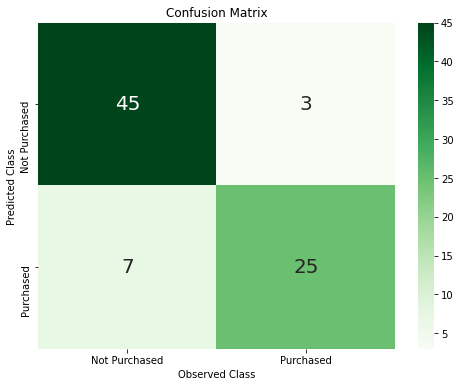

In [11]:
# test data
cm_Heatmap(y_test, log_reg.predict(X_test), class_names)

## 2. Classification Report

In [12]:
# Classification report
print(classification_report(y_test, log_reg.predict(X_test), target_names = class_names))

               precision    recall  f1-score   support

Not Purchased       0.87      0.94      0.90        48
    Purchased       0.89      0.78      0.83        32

     accuracy                           0.88        80
    macro avg       0.88      0.86      0.87        80
 weighted avg       0.88      0.88      0.87        80



## 3. AUC-ROC Curve

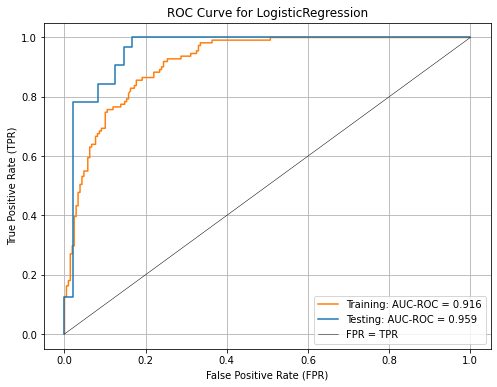

In [13]:
AUC_ROC(log_reg, X_train, X_test, y_train, y_test)

## 4. Results (on Test data)

- __Sensitivity__: $77\%$
- __Specificity__: $98\%$
- __AUC ROC__: $0.973$

# k-Nearest Neighbors

It is a non-parametric non-linear classifier. the k-NN model does not need training rather the real computation cost is when we make predictions. Lets say we want to predict the class of a new observation, the model search for the $k$ nearest observations, based on some similarity metric, count the number of observations belonging to each class and label the new observation as the class which has the highest occurence among $k$ observations.

In [14]:
# Training model
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
# Training report
print(classification_report(y_train, knn.predict(X_train), target_names = class_names))

               precision    recall  f1-score   support

Not Purchased       0.94      0.93      0.94       209
    Purchased       0.88      0.89      0.88       111

     accuracy                           0.92       320
    macro avg       0.91      0.91      0.91       320
 weighted avg       0.92      0.92      0.92       320



## 1. Confusion Matrix

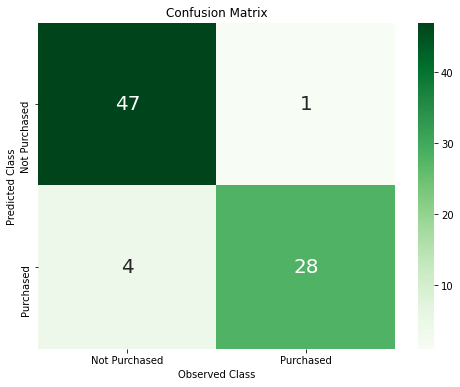

In [15]:
cm_Heatmap(y_test, knn.predict(X_test), class_names)

## 2. Classification Report

In [16]:
print(classification_report(y_test, knn.predict(X_test), target_names = class_names))

               precision    recall  f1-score   support

Not Purchased       0.92      0.98      0.95        48
    Purchased       0.97      0.88      0.92        32

     accuracy                           0.94        80
    macro avg       0.94      0.93      0.93        80
 weighted avg       0.94      0.94      0.94        80



## 3. AUC-ROC Curve

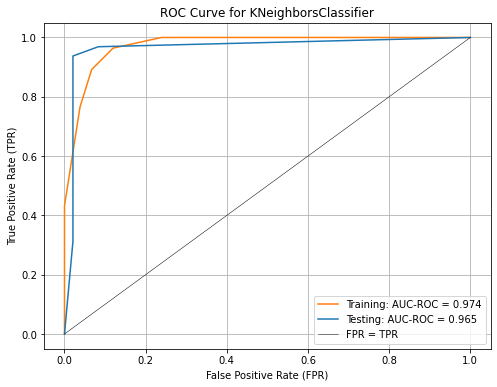

In [17]:
AUC_ROC(knn, X_train, X_test, y_train, y_test)

## 4. Results (on Test data)

- __Sensitivity__: $93\%$
- __Specificity__: $92\%$
- __AUC ROC__: $0.973$

# Decision Tree Classifier

The Decision tree Classifier is a tree based classifier. This model splits observations on the basis of their entropy. Every split is done so that entropy is maximized.

In [18]:
# Training model
dtc = DecisionTreeClassifier(max_depth = 4)
dtc.fit(X_train, y_train)
## Trainign report
print(classification_report(y_train, dtc.predict(X_train), target_names = class_names))

               precision    recall  f1-score   support

Not Purchased       0.96      0.93      0.94       209
    Purchased       0.87      0.92      0.89       111

     accuracy                           0.93       320
    macro avg       0.91      0.92      0.92       320
 weighted avg       0.93      0.93      0.93       320



## 1. Confusion Matrix

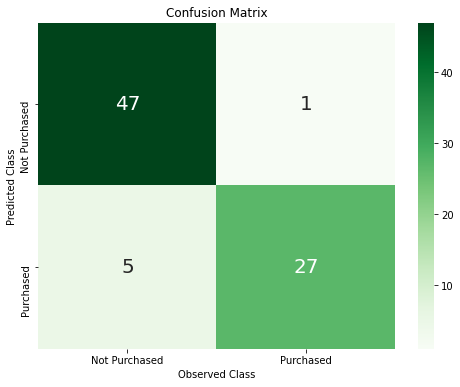

In [19]:
# test data
cm_Heatmap(y_test, dtc.predict(X_test), class_names)

## 2. Classification Report

In [20]:
# Classification report
print(classification_report(y_test, dtc.predict(X_test), target_names = class_names))

               precision    recall  f1-score   support

Not Purchased       0.90      0.98      0.94        48
    Purchased       0.96      0.84      0.90        32

     accuracy                           0.93        80
    macro avg       0.93      0.91      0.92        80
 weighted avg       0.93      0.93      0.92        80



## 3. AUC-ROC

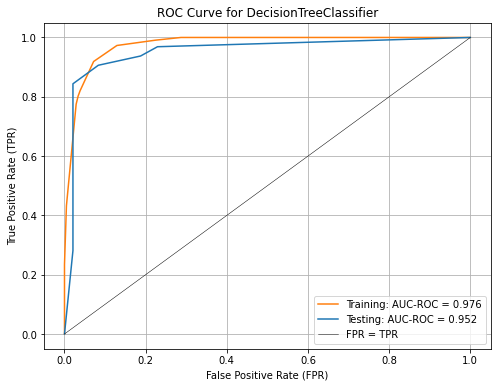

In [21]:
AUC_ROC(dtc, X_train, X_test, y_train, y_test)

## 4. Results (on Test data)

- __Sensitivity__: $87\%$
- __Specificity__: $92\%$
- __AUC ROC__: $0.918$

# Random Forest Classifier

Random Forest Classifier is an ensemble learning algorithm which means that several simpler algorithms, Decision Tree Classifier, in this case are used to build the model. Generally Random Forest Classifiers are used for larger and complex datasets. Unlike in Decision Tree Classifier, here every tree has to work with a random subset of features rather than working with the complete set of features. This is done to avoid Overfitting.

In [22]:
# Training model
rfc = RandomForestClassifier(n_estimators = 50, max_depth = 3)
rfc.fit(X_train, y_train)
# Training report
print(classification_report(y_train, rfc.predict(X_train), target_names = class_names))

               precision    recall  f1-score   support

Not Purchased       0.94      0.94      0.94       209
    Purchased       0.88      0.89      0.89       111

     accuracy                           0.92       320
    macro avg       0.91      0.91      0.91       320
 weighted avg       0.92      0.92      0.92       320



## 1. Confusion Matrix

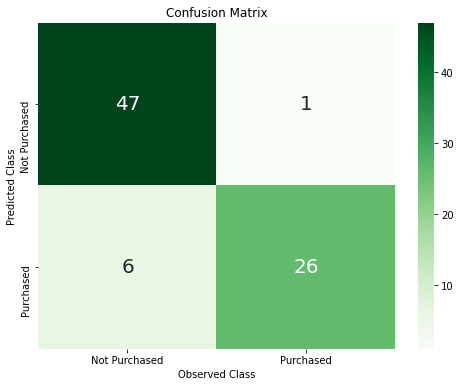

In [23]:
cm_Heatmap(y_test, rfc.predict(X_test), class_names)

## 2. Classification Report

In [24]:
print(classification_report(y_test, rfc.predict(X_test), target_names = class_names))

               precision    recall  f1-score   support

Not Purchased       0.89      0.98      0.93        48
    Purchased       0.96      0.81      0.88        32

     accuracy                           0.91        80
    macro avg       0.92      0.90      0.91        80
 weighted avg       0.92      0.91      0.91        80



## 3. AUC-ROC Curve

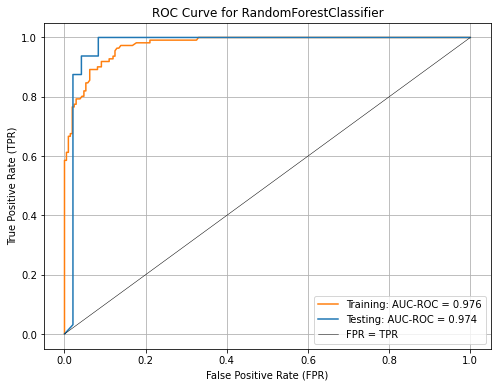

In [25]:
AUC_ROC(rfc, X_train, X_test, y_train, y_test)

## 4. Results (on Test data)

- __Sensitivity__: $97\%$
- __Specificity__: $92\%$
- __AUC ROC__: $0.972$

# Naive Bayes Classifier

This is a Bayesian approach of classification. At we we have to assign certain probabilities to individual classes called the __prior probabilities__ and using the training data, we have to update these probabilities to obtain the __posterior probability__ distribution. Using this probability distribution we can classify a new observation.

In [26]:
# Training model
nbc = GaussianNB(priors = np.array([0.5, 0.5]))
nbc.fit(X_train, y_train)
# Training report
print(classification_report(y_train, nbc.predict(X_train), target_names = class_names))

               precision    recall  f1-score   support

Not Purchased       0.94      0.89      0.91       209
    Purchased       0.81      0.90      0.85       111

     accuracy                           0.89       320
    macro avg       0.88      0.89      0.88       320
 weighted avg       0.90      0.89      0.89       320



## 1. Confusion Matrix

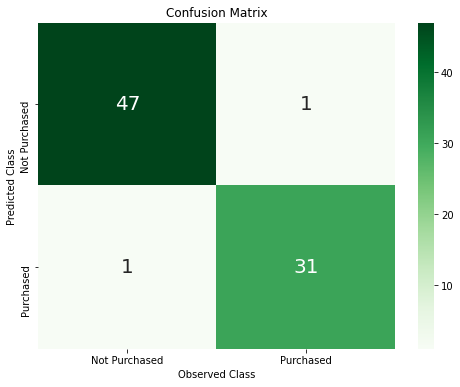

In [27]:
cm_Heatmap(y_test, nbc.predict(X_test), class_names)

## 2. Classification Report

In [28]:
print(classification_report(y_test, nbc.predict(X_test), target_names = class_names))

               precision    recall  f1-score   support

Not Purchased       0.98      0.98      0.98        48
    Purchased       0.97      0.97      0.97        32

     accuracy                           0.97        80
    macro avg       0.97      0.97      0.97        80
 weighted avg       0.97      0.97      0.97        80



## 3. AUC-ROC Curve

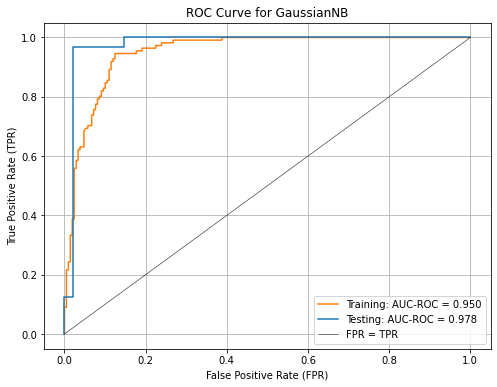

In [29]:
AUC_ROC(nbc, X_train, X_test, y_train, y_test)

## 4. Results (on Test data)

- __Sensitivity__: $100\%$
- __Specificity__: $90\%$
- __AUC ROC__: $0.985$

# Support Vector Machines

SVMs are based on the idea of finding a hyperplane which separates the data. Hyperplane is a general term for a __line__ in 2-D space or a __plane__ in 3-D space

In [30]:
svmc = SVC(probability = True)
# Training the Model
svmc.fit(X_train, y_train)
# Training Report
print(classification_report(y_train, svmc.predict(X_train), target_names = class_names))

               precision    recall  f1-score   support

Not Purchased       0.95      0.90      0.92       209
    Purchased       0.83      0.91      0.87       111

     accuracy                           0.90       320
    macro avg       0.89      0.90      0.90       320
 weighted avg       0.91      0.90      0.90       320



## 1. Confusion Matrix

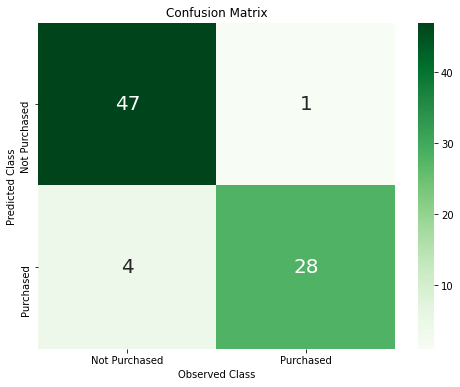

In [31]:
cm_Heatmap(y_test, svmc.predict(X_test), class_names)

## 2. Classification Report

In [32]:
print(classification_report(y_test, svmc.predict(X_test), target_names = class_names))

               precision    recall  f1-score   support

Not Purchased       0.92      0.98      0.95        48
    Purchased       0.97      0.88      0.92        32

     accuracy                           0.94        80
    macro avg       0.94      0.93      0.93        80
 weighted avg       0.94      0.94      0.94        80



## 3. AUC-ROC Curve

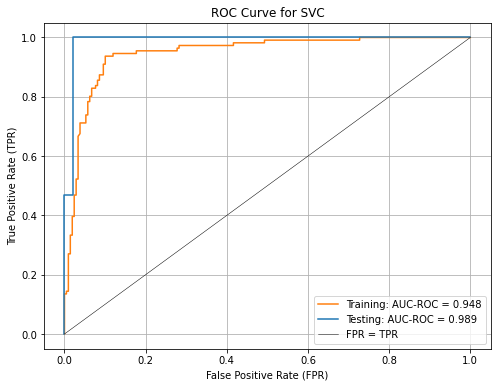

In [33]:
AUC_ROC(svmc, X_train, X_test, y_train, y_test)

## 4. Results (on Test data)

- __Sensitivity__: $100\%$
- __Specificity__: $90\%$
- __AUC ROC__: $0.971$

# Conclusion

| Model Name               | Sensitivity | Specificity | AUC ROC |
| ------------------------ | ----------- | ----------- | ------- |
| Logistic Regression      | $77\%$      | $98\%$      | $0.973$ |
| k-Nearest Neighbors      | $93\%$      | $92\%$      | $0.973$ |
| Decision Tree Classifier | $87\%$      | $92\%$      | $0.918$ |
| Random Forest Classifier | $97\%$      | $92\%$      | $0.972$ |
| Naive Bayes              | $100\%$     | $90\%$      | $0.985$ |
| Support Vector Machines  | $100\%$     | $90\%$      | $0.971$ |

- It seems that Naive Bayes classifier is the optimum model for this dataset, with the highest AUC ROC value.
- When detection of Not-Purchased is more important, the Logistic Regression is the best, with the highest Specificity.